# 차원의 저주
- 컬럼이 많으면 문제가 발생하는 것을 차원의 저주
- 컬럼이 많으면 노이즈인 컬럼이 존재할 수 있기 때문에 성능이 떨어질 수 있다.
- 컬럼이 많으면 하나의 좌표평면에 그래프를 그릴 수가 없다...

# 차원 축소
- 차원의 저주를 해결하기 위해 컬럼의 수를 줄이는 작업

# PCA
- 데이터가 투영될 축을 찾을 때 변화량을 기준
- from sklearn.decomposition import PCA


## PairPlot 
- 데이터의 각 특성간의 상관관계를 한번에 볼 수 있다.
- 산점도의 경우 x축과 y축에 특성 하나씩을 지정하여 그래프를 그린다.
- 컬럼이 많을 경우 하나의 산점도로 표현하지 못하기 때문에 산점도를
- 매우 많이 그려야 한다.
- 이렇게 매우 많이 그려주는 함수

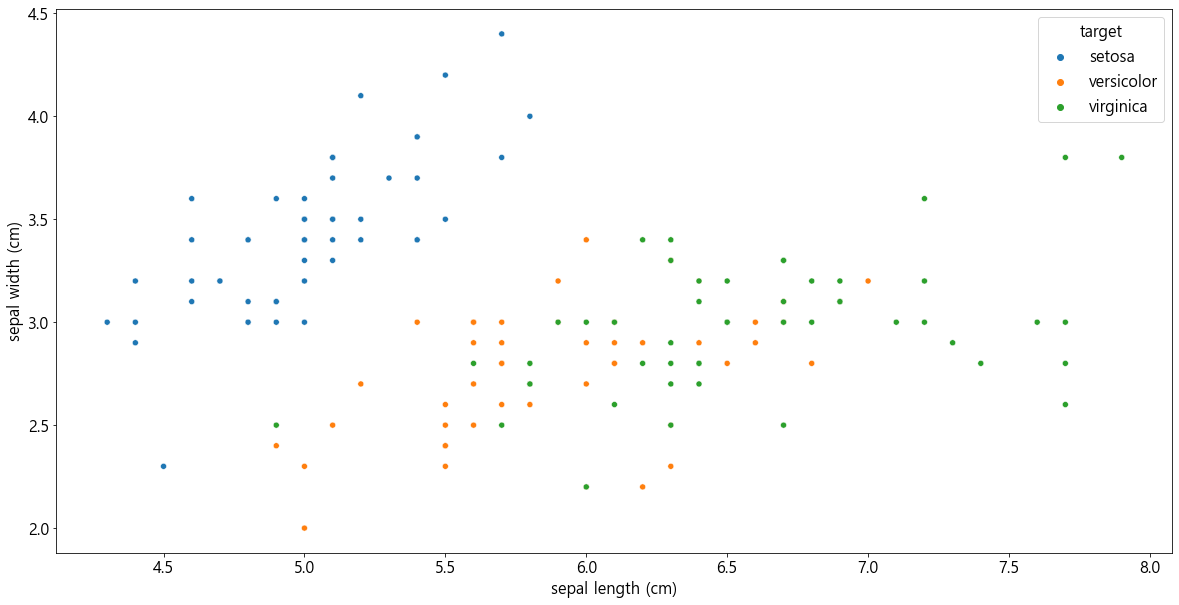

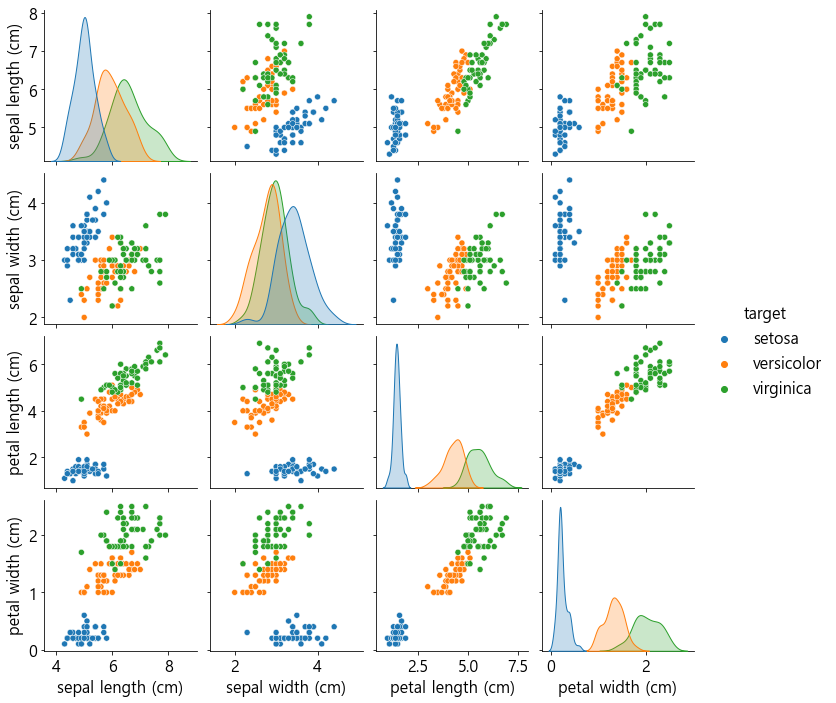

In [ ]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.show()

sns.pairplot(data=iris_df,hue='target')
plt.show()


### PCA사용
- n_components : 축소된 결과의 컬럼 개수(주 성분의 개수)

In [ ]:
pca=PCA(n_components=2)

# 결과 데이터를 제거한다.
X=iris_df.drop('target',axis=1)

#학습한다.
pca.fit(X)

#데이터를 변환한다.
r1=pca.transform(X)
r1

In [ ]:
#그래프를 그리기 위해 데이터 프레임을 생성한다
pca_df=pd.DataFrame(r1,columns=['p1','p2'])
pca_df['target']=iris_df['target']
pca_df.head()

,p1,p2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


# LDA
- from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
### - pca : 변동량이 가장 많은 컬럼을 기준으로 축을 찾아 투영하기 때문에 결과 데이터가 겹쳐지는 구간이 발생할 수 있다.
### - lda : 결과 데이터들이 가장 잘 구분될 수 있는 축을 찾아 투영한다. 이 때문에 결과가 중첩된 구간이 많으면 lda가 좀더 학습에 도움이 될 수도 있다.

#### 데이터 준비>데이터 전처리(X,y-인코딩( LabelEncoder())-차원축소 PCA(),LDA()))

In [ ]:
# 순수 데이터로 테스트를 하고자 한다면 주석처리
# scaler1 = StandardScaler()
# scaler1.fit(X)
# X = scaler1.transform(X)

### PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
pca_X

### LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
lda_X = lda.transform(X)
lda_X

In [ ]:
# 학습 모델을 생성한다.
model1 = XGBClassifier(silent=True, verbosity=0) # 차원축소X
model2 = XGBClassifier(silent=True, verbosity=0) # PCA()
model3 = XGBClassifier(silent=True, verbosity=0) # LDA()

In [ ]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y, scoring='accuracy', cv=kfold)
r2 = cross_val_score(model2, pca_X, y, scoring='accuracy', cv=kfold)
r3 = cross_val_score(model3, lda_X, y, scoring='accuracy', cv=kfold)

print(r1.mean()) #0.9333333333333333
print(r2.mean()) # 0.9666666666666668
print(r3.mean()) # 0.9733333333333334

0.9333333333333333
0.9666666666666668
0.9733333333333334


# 군집화 (Clustering)
- 결과데이터가 없는 데이터를 그룹화 하는 비지도 학습

# K-means
- from sklearn.cluster import KMeans
- 개발자가 군집의 개수를 정해주면 거리가 가까운 데이터들 끼리 정해진 개수만큼의 그룹으로 그룹화된다.
- 이상치에 매우 민감하다.
- 대부분의 군집 작업에서 사용된다.


In [ ]:
#n_clusters : 군집의 개수, 생성되는 센트로이드의 개수
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

In [ ]:
#군집의 결과를 가져온다,
kmeans.labels_

In [ ]:
# 예측 결과를 가진 데이터프레임 생성을 위해 입력데이터를 복제한다.
predict_df = X.copy()
predict_df['target']=kmeans.labels_
predict_df

In [ ]:
sns.pairplot(data=iris_df, hue='target')
plt.show()

# Mean Shift
- 개발자가 정해준 거리를 기반으로 밀집도가 높은 데이터들 끼리 그룹으로 묶는 군집
- 그룹의 개수를 예측이 불가능하며 군집의 수를 줄이려면 bandwith의 크기를 늘리고 군집의 수를 늘리려면 bandwith의 크기를 줄인다.
- from sklearn.cluster import MeanShift
- from sklearn.cluster import estimate_bandwidth


In [ ]:
# mean shift
mean1 = MeanShift(bandwidth=0.85)
labels = mean1.fit_predict(X)
labels

### 최적의 벤드위드를 파악한다.
- quantile : 최적의 밴드위치를 찾기위해 사용하는 데이터 샘플링 비율
- 최적의 벤드위드를 파악한다.
- quantile : 최적의 밴드위치를 찾기위해 사용하는 데이터 샘플링 비율
- 그룹의 개수를 줄이고 싶다면 quantile 값을 늘리고 그룹의 개수를 늘리고 싶다면
- quantile 값을 줄여준다.
- quantile 값이 낮으면 bandwith값도 낮고 
- quantile 값이 크면 bandwith의 값도 크다.



In [ ]:
#전체데이터의 18%를 뜯어내서 거기서 벤드위치파악(5-6회 찾는작업,기본 quantile=0.3)
band1= estimate_bandwidth(X, quantile=0.18) 
band1

In [ ]:
mean2 = MeanShift(bandwidth=band1)
labels2 = mean2.fit_predict(X)
labels2